<a href="https://colab.research.google.com/github/Swetha192004/Animal-Classification-using-Neural-Network-on-Zoo-Dataset/blob/main/Distribution_of_Essential_Amenities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

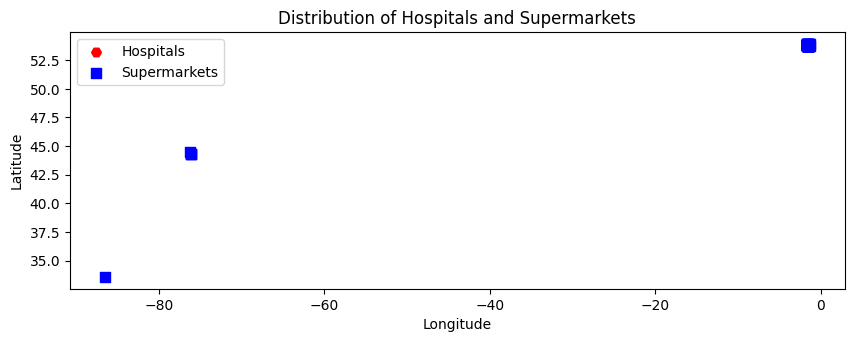

In [ ]:
# Install necessary packages
!pip install geopandas
!pip install folium

import geopandas as gpd
import matplotlib.pyplot as plt
import folium

# Load GeoJSON data
file_path = '/content/export (1).geojson'
gdf = gpd.read_file(file_path)

# Plot the data using geopandas
fig, ax = plt.subplots(figsize=(10, 10))
gdf[gdf['amenity'] == 'hospital'].plot(ax=ax, color='red', marker='H', markersize=50, label='Hospitals')
gdf[gdf['shop'] == 'supermarket'].plot(ax=ax, color='blue', marker='s', markersize=50, label='Supermarkets')

# Add legend and labels
ax.legend()
ax.set_title('Distribution of Hospitals and Supermarkets')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

# Create a folium map
m = folium.Map(location=[gdf.geometry.y.mean(), gdf.geometry.x.mean()], zoom_start=12)

# Add hospitals as red markers
for idx, hospital in gdf[gdf['amenity'] == 'hospital'].iterrows():
    folium.Marker([hospital.geometry.y, hospital.geometry.x], icon=folium.Icon(color='red'), popup=hospital['name']).add_to(m)

# Add supermarkets as blue markers
for idx, supermarket in gdf[gdf['shop'] == 'supermarket'].iterrows():
    folium.Marker([supermarket.geometry.y, supermarket.geometry.x], icon=folium.Icon(color='blue'), popup=supermarket['name']).add_to(m)

# Show the map
m


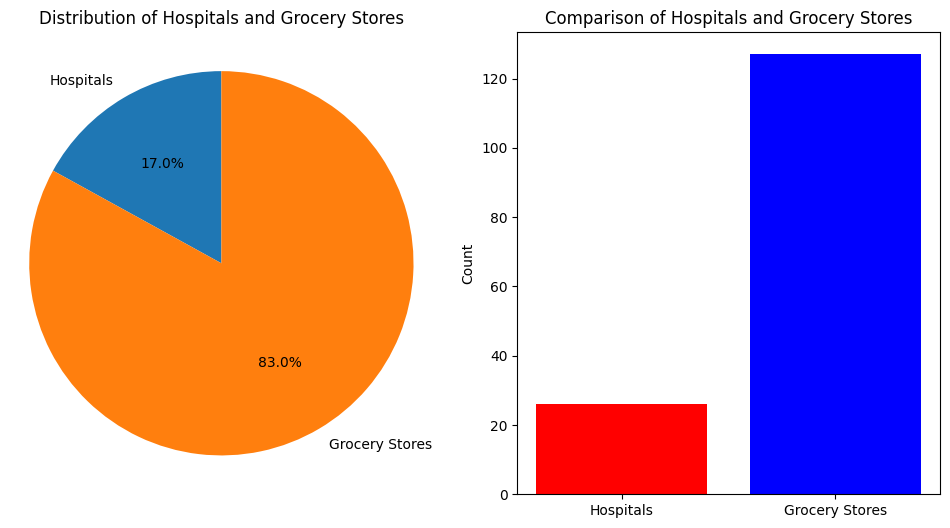

In [ ]:
import matplotlib.pyplot as plt

# Filter the GeoDataFrame for hospitals and grocery stores
hospitals = gdf[gdf['amenity'] == 'hospital']
grocery_stores = gdf[gdf['shop'] == 'supermarket']

# Count the number of each amenity type
hospital_counts = hospitals.shape[0]
grocery_counts = grocery_stores.shape[0]

# Plot a pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie([hospital_counts, grocery_counts], labels=['Hospitals', 'Grocery Stores'], autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Distribution of Hospitals and Grocery Stores')

# Bar chart
amenity_types = ['Hospitals', 'Grocery Stores']
counts = [hospital_counts, grocery_counts]

axes[1].bar(amenity_types, counts, color=['red', 'blue'])
axes[1].set_ylabel('Count')
axes[1].set_title('Comparison of Hospitals and Grocery Stores')

plt.show()


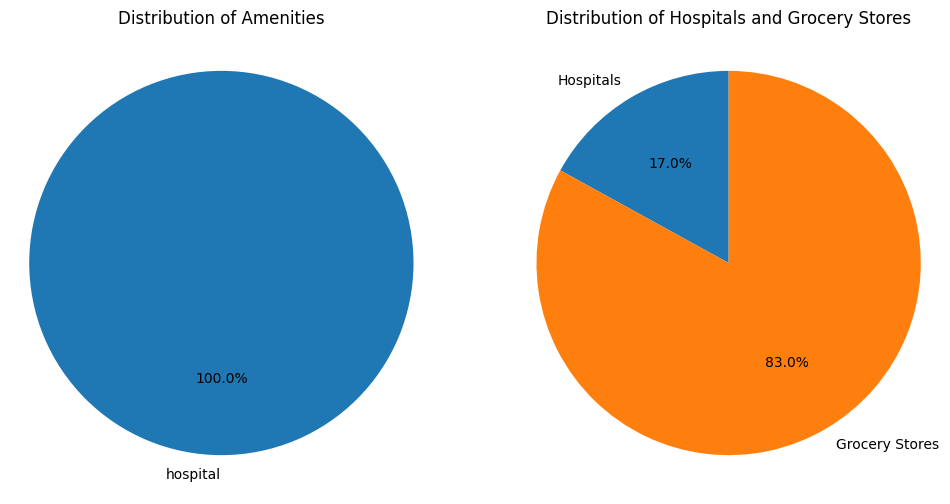

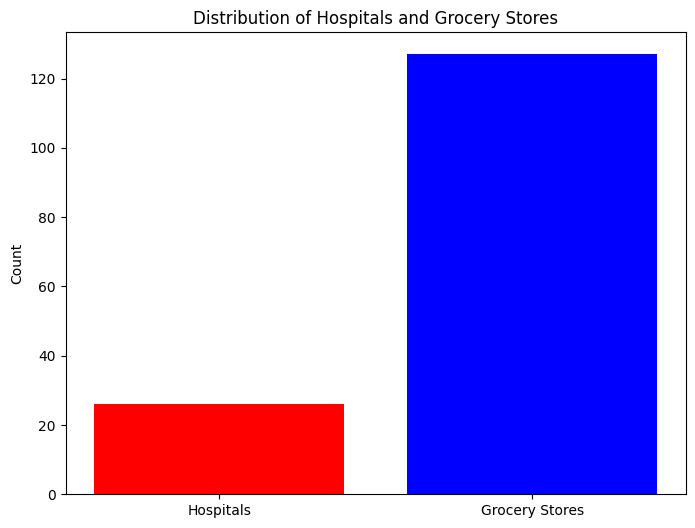

In [ ]:
import matplotlib.pyplot as plt

# Count the number of hospitals and grocery stores
amenity_counts = gdf['amenity'].value_counts()

# Filter the data for hospitals and grocery stores
hospitals = gdf[gdf['amenity'] == 'hospital']
grocery_stores = gdf[gdf['shop'] == 'supermarket']

# Count the number of hospitals and grocery stores
hospital_count = len(hospitals)
grocery_count = len(grocery_stores)

# Plot a pie chart
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for overall amenity distribution
ax[0].pie(amenity_counts, labels=amenity_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title('Distribution of Amenities')

# Pie chart for hospitals and grocery stores
ax[1].pie([hospital_count, grocery_count], labels=['Hospitals', 'Grocery Stores'], autopct='%1.1f%%', startangle=90)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].set_title('Distribution of Hospitals and Grocery Stores')

plt.show()

# Bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Bar chart for hospitals and grocery stores
ax.bar(['Hospitals', 'Grocery Stores'], [hospital_count, grocery_count], color=['red', 'blue'])
ax.set_title('Distribution of Hospitals and Grocery Stores')
ax.set_ylabel('Count')

plt.show()
